<a href="https://colab.research.google.com/github/Khalil1232/Predict-Customer-Churn-in-Python/blob/main/Predict_Customer_Churn_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Customer Churn with Python**



## **Table of Contents**

- 1	Introduction
- 2	Import libraries
- 3	Read dataset
- 4	Exploratory data analysis (EDA)
   - 4.1 Shape of dataset
   - 4.2 Preview dataset
   - 4.3 Summary of dataset
   - 4.4 Statistical properties of dataset
- 5	Feature selection
- 6	Convert categorical columns to numeric columns
  - 6.1	Explore Gender variable
  - 6.2	Explore Geography variable
- 7	Feature Scaling
- 8	Model Training
  - 8.1	Predict accuracy with different algorithms
  - 8.2	Plot the classifier accuracy scores
- 9	Feature Importance
  - 9.1	Feature importance with Random Forest model
  - 9.2	Drop least important feature
- 10 Confusion Matrix
- 11 Classification Metrices
  - 11.1 Classification Report
  - 11.2 Classification Accuracy
  - 11.3 Classification Error
  - 11.4 Precision
  - 11.5 Recall
  - 11.6 True Positive Rate
  - 11.7 False Positive Rate
  - 11.8 Specificity (True Negative Rate)
  - 11.9 f1 – score
  - 11.10	Support
- 12 Cross-Validation
- 13 Results and Conclusion
- 14 References



## **1. Introduction**


- **Customer churn** (also known as customer attrition) is the loss of clients or customers. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. In this project, we will build a machine learning model to predict customer churn.

## **2. Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [ ]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

In [ ]:
# Classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

## **3. Read dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
%cd "/content/drive/MyDrive/kaggle"

/content/drive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d shrutimechlearn/churn-modelling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 53.6MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
file_path = '/content/drive/MyDrive/kaggle/Churn_Modelling.csv'


In [ ]:
df = pd.read_csv(file_path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **4. Exploratory Data Analysis**

### **4.1 Shape of dataset**

In [ ]:
df.shape

(10000, 14)

- Our dataset contains 10000 instances and 14 variables.

- Now, let's take a quick look on our dataset.

### **4.2 Preview dataset**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **4.3 Summary of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- We can see that there are 3 categorical variables and 11 numerical variables in the dataset.

- Also, there are no missing values in the dataset.

### **4.4 Statistical properties of dataset**

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **5 Feature selection**


- We can see that there are 14 variables in the dataset.

- The target variable is **Exited** and there are remaining 13 variables.

- All the remaining 13 variables are not useful for prediction. We have to select the relevant variables.

- So, first let's check the variables in the dataset.


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Not all columns affect the customer churn. Let's discuss each column one by one:

1. **RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.
2. **CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.
3. **Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
4. **CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. **Geography** — a customer's location can affect their decision to leave the bank. We'll keep this column.
6. **Gender** — it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.
7. **Age** —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. **Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. **NumOfProducts** — refers to the number of products that a customer has purchased through the bank.
11. **HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. **IsActiveMember** — active customers are less likely to leave the bank, so we'll keep this.
13. **EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. **Exited** — whether or not the customer left the bank. This is what we have to predict.

- So, we'll remove the **RowNumber**, **CustomerId** and **Surname** columns from our feature set. All the remaining columns do contribute to the customer churn in one way or another.

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## **6. Convert categorical columns to numeric columns**


- Now, in our dataset, we have two categorical columns: **Gender** and **Geography**. We should convert them into numerical format.

#### **6.1 Explore Gender variable**

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# let's do One Hot Encoding of Gender variable
# get k dummy variables after One Hot Encoding

df['Gender'] = pd.get_dummies(df['Gender'], drop_first = True)

- Now, let's take a look again at our dataset.

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


- Here 1 stands for female and 0 stands for male.

#### **6.2 Explore Geography variable**

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# let's do One Hot Encoding of Goegraphy variable
# get k dummy variables after One Hot Encoding

df = pd.get_dummies(df, prefix="Geography", columns=["Geography"], drop_first=False)

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


- Let's again take a look at our dataset.

In [ ]:
df.head(200)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,807,1,35,3,174790.15,1,1,1,600.36,0,1,0,0
196,616,0,32,6,0.00,2,1,1,43001.46,0,0,0,1
197,721,1,37,3,107720.64,1,1,1,158591.12,0,0,1,0
198,501,1,57,10,0.00,2,1,1,47847.19,0,1,0,0


## **7. Feature Scaling**

In [ ]:
X =  df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740


## **8. Model Training**

- We can see that our dataset is now ready to be fed into a ML model. We will proceed as follows:-


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **8.1 Predict accuracy with different algorithms**


- Let's predict accuracy with different algorithms and evaluate their performance.

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting",
         "LDA", "QDA", "Neural Net", "XGBoost" ]

In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    xgb.XGBClassifier()
   ]

In [ ]:
accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.811
Nearest Neighbors  :  0.8295
Naive Bayes  :  0.828
Linear SVM  :  0.8035
RBF SVM  :  0.8085
Decision Tree  :  0.858
Random Forest  :  0.811
AdaBoost  :  0.8575
Gradient Boosting  :  0.864
LDA  :  0.8085
QDA  :  0.8335


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Net  :  0.8665
XGBoost  :  0.861


In [ ]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.8110
1,Nearest Neighbors,0.8295
2,Naive Bayes,0.8280
3,Linear SVM,0.8035
4,RBF SVM,0.8085
5,Decision Tree,0.8580
6,Random Forest,0.8110
7,AdaBoost,0.8575
8,Gradient Boosting,0.8640
9,LDA,0.8085


- The accuracy score of top performing algorithms in descending order is given below -

In [ ]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
11,Neural Net,0.8665
8,Gradient Boosting,0.8640
12,XGBoost,0.8610
5,Decision Tree,0.8580
7,AdaBoost,0.8575
10,QDA,0.8335
1,Nearest Neighbors,0.8295
2,Naive Bayes,0.8280
0,Logistic Regression,0.8110
6,Random Forest,0.8110


#### **8.2 Plot the classifier accuracy scores**

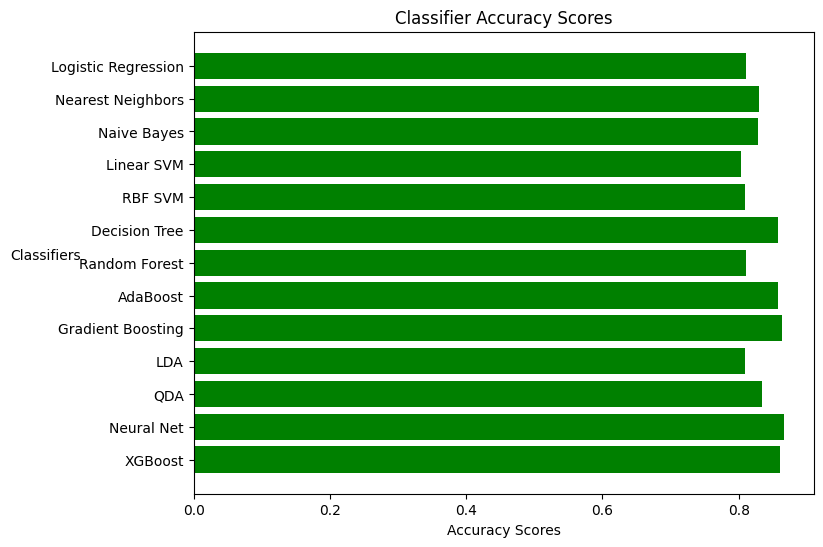

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
x = classifiers_performance['Accuracy Scores']
y = classifiers_performance['Classifiers']
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Scores')
ax.set_ylabel('Classifiers', rotation=0)
ax.set_title('Classifier Accuracy Scores')
plt.show()

## **9. Feature Importance**

- In this section, we will see how to improve model performance by feature selection.

- We will visualize feature importance with random forest classifier and drop the least important feature, rebuild the model and check effect on accuracy.



#### **9.1 Feature importance with Random Forest model**


- Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

- First, I will create the Random Forest model as follows:-

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

- Now, I will use the feature importance variable to see feature importance scores.

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age                  0.238381
EstimatedSalary      0.146272
CreditScore          0.142255
Balance              0.139533
NumOfProducts        0.133557
Tenure               0.082161
IsActiveMember       0.039703
Geography_Germany    0.020550
Gender               0.019048
HasCrCard            0.019008
Geography_France     0.010086
Geography_Spain      0.009446
dtype: float64

- We can see that the most important feature is **Age** and least important feature is **Geography**.

#### **9.2 Drop least important feature**

- Now, I will drop the least important feature **Geography** from the model, rebuild the model and check its effect on accuracy.

In [ ]:
# drop the least important feature Gender from X_train and X_test for further analysis
X1_train = X_train.drop(['Geography_France', 'Geography_Germany', 'Geography_Spain'], axis=1)
X1_test = X_test.drop(['Geography_France', 'Geography_Germany', 'Geography_Spain'], axis=1)

<ipython-input-34-7e4ddac20fb9>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X1_train = X_train.drop(['Geography_France', 'Geography_Germany', 'Geography_Spain'], axis=1)
<ipython-input-34-7e4ddac20fb9>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X1_test = X_test.drop(['Geography_France', 'Geography_Germany', 'Geography_Spain'], axis=1)


In [ ]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X1_train, y_train)
    score = clf.score(X1_test, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.814
Nearest Neighbors  :  0.8355
Naive Bayes  :  0.8265
Linear SVM  :  0.8035
RBF SVM  :  0.812
Decision Tree  :  0.8575
Random Forest  :  0.826
AdaBoost  :  0.8515
Gradient Boosting  :  0.866
LDA  :  0.813
QDA  :  0.8295
Neural Net  :  0.861
XGBoost  :  0.8485


- Now, we will compare our original accuracy and latest accuracy from the model.

In [ ]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores,
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

,Classifiers,Accuracy Scores,Accuracy Scores1
0,Logistic Regression,0.8110,0.8140
1,Nearest Neighbors,0.8295,0.8355
2,Naive Bayes,0.8280,0.8265
3,Linear SVM,0.8035,0.8035
4,RBF SVM,0.8085,0.8120
5,Decision Tree,0.8580,0.8575
6,Random Forest,0.8110,0.8260
7,AdaBoost,0.8575,0.8515
8,Gradient Boosting,0.8640,0.8660
9,LDA,0.8085,0.8130


- We can see that dropping the least important feature **Geography** from the model does not result in performance improvement.

- We can see that XGBoost has maximum accuracy of 0.848.

- So, we will use the XGBoost Classifier to plot the confusion-matrix.

## **10. Confusion Matrix**


- A **confusion matrix** is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

- Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- **True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- **True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- **False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- **False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

- These four outcomes are summarized in a confusion matrix.

- We will use the XGBoost Classifier to plot the confusion-matrix.

In [ ]:
# instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier()


# fit the classifier to the modified training set
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# predict on the test set
y_pred = xgb_clf.predict(X_test)

In [ ]:
# print the accuracy
print('XGBoost Classifier model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost Classifier model accuracy score: 0.8610


In [ ]:
# print confusion-matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1523   84]
 [ 194  199]]

True Positives(TP) =  1523

True Negatives(TN) =  199

False Positives(FP) =  84

False Negatives(FN) =  194


The confusion matrix shows 1523 + 199 = 1722 correct predictions and 84 + 194 = 278 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 1523
- True Negatives (Actual Negative:0 and Predict Negative:0) - 199
- False Positives (Actual Negative:0 but Predict Positive:1) - 84 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 194 (Type II error)

<Axes: >

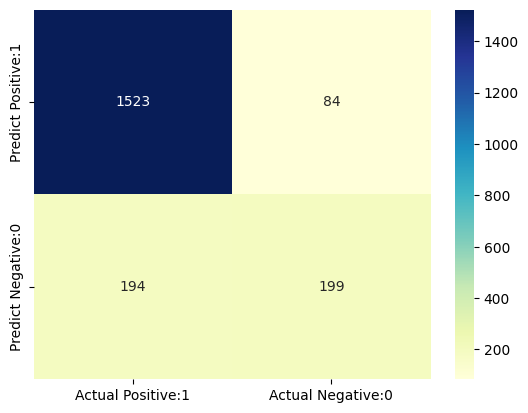

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## **11. Classification Metrics**

#### **11.1 Classification Report**


- **Classification Report** is another way to evaluate the classification model performance.
- It displays the **precision**, **recall**, **f1** and **support** scores for the model.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### **11.2 Classification Accuracy**

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8610


#### **11.3 Classification Error**

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1390


#### **11.4 Precision**

- **Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).


In [ ]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9477


#### **11.5 Recall**

- **Recall** can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8870


#### **11.6 True Positive Rate**

- **True Positive Rate** is synonymous with **Recall**.

In [ ]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8870


#### **11.7 False Positive Rate**

In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.2968


#### **11.8 Specificity (True Negative Rate)**


- **Specificity** is also called **True Negative Rate**.

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7032


#### **11.9 f1-score**

- **f1-score** is the weighted harmonic mean of precision and recall.
- The best possible f1-score would be 1.0 and the worst would be 0.0.



#### **11.10 Support**

- **Support** is the actual number of occurrences of the class in our dataset.

## **12. Cross Validation**


- We will check whether **Cross Validation** results in performance improvement.

In [ ]:
# iterate over classifiers and calculate cross-validation score
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))

Logistic Regression :0.8088
Nearest Neighbors :0.8262
Naive Bayes :0.8171
Linear SVM :0.7945
RBF SVM :0.7985
Decision Tree :0.8541
Random Forest :0.8076
AdaBoost :0.8562
Gradient Boosting :0.8618
LDA :0.8076


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA :0.8207
Neural Net :0.8600
XGBoost :0.8524


- It can be seen that cross-validation does not result in performance improvement.

## **13. Results and Conclusion**


-	In this project, we build an ML model to predict the churn-rate of the customer.
-	There are no missing values in the dataset.
-	**RowNumber**, **CustomerId** and **Surname** have no predictive power. So, we have dropped them from the dataset.
-	There are two categorical variables - **Gender** and **Geography**. We have converted them into numerical variable.
-	We have trained the model with different algorithms and compare their accuracy.
-	XGBoost fared better than other algorithms and resulted in maximum accuracy of 0.852.
-	We find the most important feature as **Age** and least important feature as **Gender**. Dropping the least important feature **Geography** does not result in performance improvement.
-	We find :-
    - True Positives (Actual Positive:1 and Predict Positive:1) - 1523
    - True Negatives (Actual Negative:0 and Predict Negative:0) - 199
    - False Positives (Actual Negative:0 but Predict Positive:1) - 84 (Type I error)
    - False Negatives (Actual Positive:1 but Predict Negative:0) - 194 (Type II error)
-	Cross-validation does not result in performance improvement.





## **14. References**

This notebook is inspired from the following notebook-

- https://learnpython.com/blog/python-customer-churn-prediction/